# Basic Image Processing In Python

In [212]:
import numpy as np # 당연히 행렬 다뤄야 하니까
import os # 현재 폴더를 가지고 오려고
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
from skimage import io
from skimage import transform
import cv2
import matplotlib.font_manager as fm
%matplotlib inline
print("ㅎㅎ Hell로우")

ㅎㅎ Hell로우


# 현재의 폴더는?

In [20]:
cwd = os.getcwd() # 폴더 정보 os
print("Current Folder is %s " %(cwd))

Current Folder is C:\Users\gunooknam\Desktop\machine_learning\Homework\Deep_learning_Study\etc 


# 이미지의 타입을 출력

In [21]:
def print_typeshape(img):
    print("Type is %s"  %(type(img)))
    print("Shape is %s "% (img.shape,))

# 이미지를 불러와보자

In [23]:
cat = io.imread("./data/cats/images (1).jpeg")
print_typeshape(cat)
# 저러한 cat 3채널로 되어 있다.

Type is <class 'numpy.ndarray'>
Shape is (225, 225, 3) 


# 고양이를 화면에 띄워보자

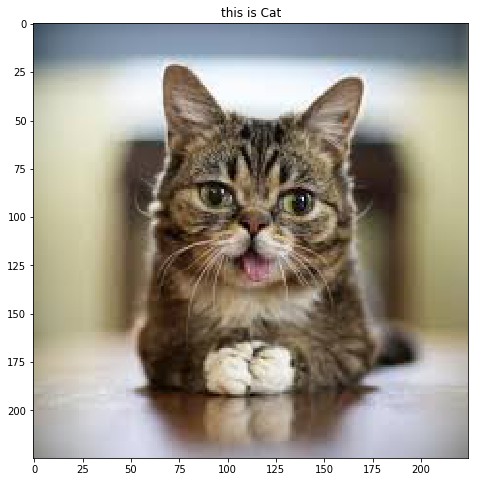

In [29]:
plt.figure(figsize=(10,8)) # figure에다가 figsize를 넣는다.
plt.imshow(cat)
plt.title("this is Cat")
plt.draw()

# 이렇게 불러온 고양이는 정수가 들어있다.
여기서 타입을 확인해야 한다.

In [33]:
cat[0][:5]

array([[ 59,  76,  92],
       [ 60,  77,  93],
       [ 62,  79,  95],
       [ 65,  82,  98],
       [ 68,  85, 101]], dtype=uint8)

# 고런데 float로 불러올 수 있다.

In [38]:
cat2 = io.imread("./data/cats/images (1).jpeg").astype(np.float)
print_typeshape(cat2)

Type is <class 'numpy.ndarray'>
Shape is (225, 225, 3) 


# 하지만 요상한 그림이 나온다.
왜 그럴까? imshow라는 함수로 그림을 그릴 때 인자로 받는 tensor가 int 타입이면 0~255 사이 값을
가질 것을 가정하고, 만약에 float 타입이면 0~1사이로 가정을 한다.
### ★ plt.show()는 인트가 들어오면 0~255, float 가 들어오면 0~1 값 !!!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


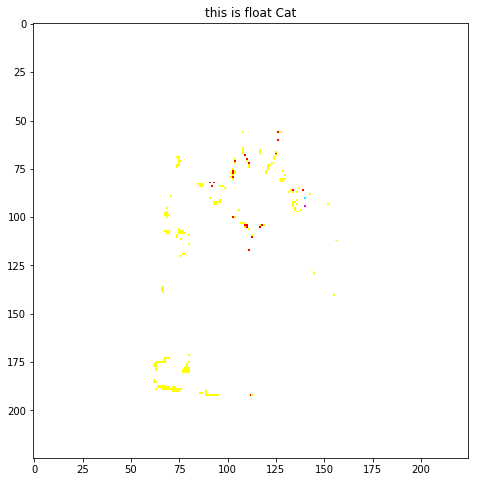

In [39]:
plt.figure(figsize=(10,8)) # figure에다가 figsize를 넣는다.
plt.imshow(cat2)
plt.title("this is float Cat")
plt.draw()

# 그림을 제대로 그리고 싶거든
255로 나눠줘야 한다.

Type is <class 'numpy.ndarray'>
Shape is (225, 225, 3) 


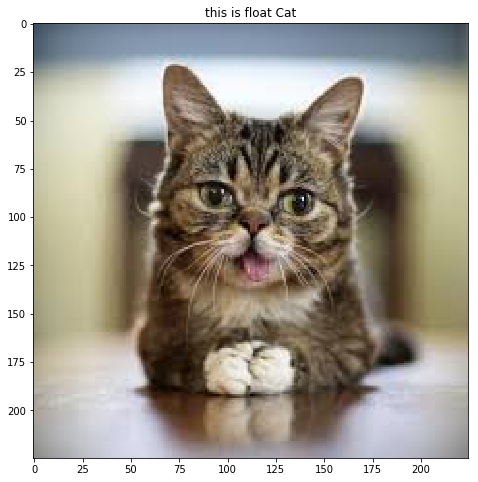

In [43]:
cat3 = io.imread("./data/cats/images (1).jpeg").astype(np.float)/255. #.으로 나누는 것이다. 타입 맞추깅
print_typeshape(cat3)
plt.figure(figsize=(10,8)) # figure에다가 figsize를 넣는다.
plt.imshow(cat3)
plt.title("this is float Cat")
plt.draw()

## 이미지를 Resize로 해주기
그림의 크기를 원하는 크기로 줄일 것이다.

Type is <class 'numpy.ndarray'>
Shape is (200, 100, 3) 


C:\Users\gunooknam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


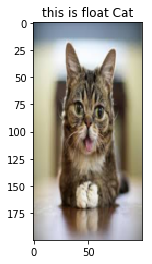

In [62]:
catsmall = imresize(cat3, [200,100])
print_typeshape(catsmall)

# RGB다. 
plt.figure(1) # figure에다가 figsize를 넣는다.
plt.imshow(catsmall)
plt.title("this is float Cat")
plt.draw()

# 흑백사진으로 바꾸자
opencv에는 흑백으로 바꾸는 코드가 있지만 opencv를 쓰지 않고 해보자

이미지 채널이 3채널이라면 weighted sum 아니면 그냥 리턴

In [136]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    # 앞의 차원은 그냥 냅두고 0,1,2 이렇게 3개를 각,각 weighted sum을 해주는 것이다.
    else :
        print ("Current Image if GRAY!")
        return rgb

# 흑백이미지 보여주기
반드시 plt.imshow를 하려면 cmap이라는 color맵을 파라미터로 넣어주자

size of Booksmallgray is (499, 398)
size of Booksmallgray is  <class 'numpy.ndarray'>


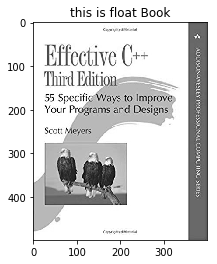

In [157]:
Book = io.imread("./data/test.jpg")
Booksmallgray = rgb2gray(Book)
print("size of Booksmallgray is %s" % (Booksmallgray.shape,))
print("size of Booksmallgray is ", type(Booksmallgray))

# gray다. 
plt.figure(1) # figure에다가 figsize를 넣는다.
plt.imshow(catsmallgray, cmap=plt.get_cmap("gray"))
plt.title("this is float Book")
plt.draw()

## cmap이라는 color맵이... 없다면?

색깔이 변한다.

why? 행렬을 그리고 있기 때문에 행렬의 값이 rgb든 그런데 중요하지 않음
그래서 color 맵을 통해서 각각의 값을 색깔로 표현할 수 있다.
다양한 표현이 있다. jet이런거
### ● 그래서 흑백사진이라면 Cmap을 gray로 해줘라

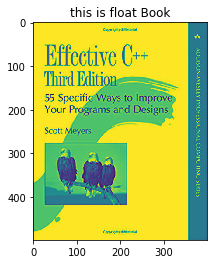

In [146]:
plt.figure(1) # figure에다가 figsize를 넣는다.
plt.imshow(catsmallgray)
plt.title("this is float Book")
plt.draw()

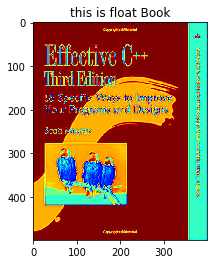

In [147]:
plt.figure(1) # figure에다가 figsize를 넣는다.
plt.imshow(catsmallgray, cmap=plt.get_cmap("jet"))
plt.title("this is float Book")
plt.draw()

# Reshape로 모양바꿔버리기
resize는 주어진 사이즈를 바꾸고, reshape는 주어진 모양을 바꾼다.

→ 1열로 쭉피고, 다시 225,225로 reshape

(225, 225)
size of catrowvec is (1, 50625)
size of catrowvec is <class 'numpy.ndarray'>
size of catmatrix is (225, 225)
type of catmatrix is <class 'numpy.ndarray'>


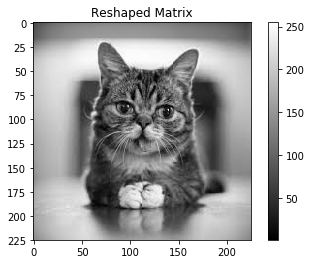

In [178]:
# MATRIX TO VECTOR
newcat = rgb2gray(cat2)
print(newcat.shape)
cattovec= np.reshape(newcat, (1, -1)) 
# "뒤에 -1을 붙인 것은 한줄로 피되 알아서 피라" 라는 뜻이다.

print ("size of catrowvec is %s" % (cattovec.shape,))
print ("size of catrowvec is", type(cattovec))

# VECTOR TO MATRIX
cattomatrix = np.reshape(cattovec, (225, -1))
print ("size of catmatrix is %s" % (cattomatrix.shape,))
print ("type of catmatrix is", type(cattomatrix))

plt.imshow(cattomatrix, cmap=plt.get_cmap("gray"))
plt.title("Reshaped Matrix")
plt.colorbar()
plt.draw()


# 해당 폴더에 있는 이미지들을 가져오자
* os.getcwd()는 현재 위치에 대한 정보를 불러온다.
* os.listdir로 현재 폴더 안에 파일정보를 리스트 형태로 불러올 수 있다.

In [189]:
cwd = os.getcwd()
path = cwd + "/data/cats"
flist = os.listdir(path)
print("이것은 폴더안에 들은 파일 개수 [%d]\n이것은 현재 path \n[%s]" % (len(flist), path))

이것은 폴더안에 들은 파일 개수 [38]
이것은 현재 path 
[C:\Users\gunooknam\Desktop\machine_learning\Homework\Deep_learning_Study\etc/data/cats]


In [192]:
# enumerate는 index, value값을 같이 객체로 담고 있다.
for i, f in enumerate(flist):
    print("[%d] 번째 파일은 ? : [%s]" % (i,f))

[0] 번째 파일은 ? : [images (1).jpeg]
[1] 번째 파일은 ? : [images (10).jpeg]
[2] 번째 파일은 ? : [images (11).jpeg]
[3] 번째 파일은 ? : [images (12).jpeg]
[4] 번째 파일은 ? : [images (13).jpeg]
[5] 번째 파일은 ? : [images (14).jpeg]
[6] 번째 파일은 ? : [images (15).jpeg]
[7] 번째 파일은 ? : [images (16).jpeg]
[8] 번째 파일은 ? : [images (17).jpeg]
[9] 번째 파일은 ? : [images (18).jpeg]
[10] 번째 파일은 ? : [images (19).jpeg]
[11] 번째 파일은 ? : [images (2).jpeg]
[12] 번째 파일은 ? : [images (20).jpeg]
[13] 번째 파일은 ? : [images (21).jpeg]
[14] 번째 파일은 ? : [images (22).jpeg]
[15] 번째 파일은 ? : [images (23).jpeg]
[16] 번째 파일은 ? : [images (24).jpeg]
[17] 번째 파일은 ? : [images (25).jpeg]
[18] 번째 파일은 ? : [images (26).jpeg]
[19] 번째 파일은 ? : [images (27).jpeg]
[20] 번째 파일은 ? : [images (28).jpeg]
[21] 번째 파일은 ? : [images (29).jpeg]
[22] 번째 파일은 ? : [images (3).jpeg]
[23] 번째 파일은 ? : [images (30).jpeg]
[24] 번째 파일은 ? : [images (31).jpeg]
[25] 번째 파일은 ? : [images (32).jpeg]
[26] 번째 파일은 ? : [images (33).jpeg]
[27] 번째 파일은 ? : [images (4).jpeg]
[28] 번째 파일은 ? : [images (5).jpeg]


# 내가 사용할 확장자 지정
폴더 안에 이미지만 있는 것이 아니라 다른 파일도 있을 수 있기 때문에
내가 무슨 확장자의 파일을 사용할지에 대해 정해준다.
* os.path.splitext(f) 이라는 함수를 쓸 것이다. os.path.splitext라는 함수를 쓰게 되면 파일명, 확장자 이렇게 따로 튜플형식으로 가른다.
* lower()라는 함수는 소문자로 바꾸는 함수인데 내가 정의한 valid_exts가 소문이 이므로 소문자로 바꾸고 이것이 in keyword를 사용하여
valid_exts라는 배열에 있을 때만 이미지를 리스트에 추가한다.
* imread에 넣어줄 때는 반드시 fullpath로 넣어주는 방법이 있다.


In [223]:
valid_exts = [".jpg",
              ".jpeg",
              ".png"]
font_path = 'C:/Windows/Fonts/H2GTRE.TTF'
fontprop = fm.FontProperties(fname=font_path, size=18)
# 내가 쓸 이미지의 확장자를 정의

imgs = []
names = []
for f in flist: # flist에서 file 이름을 가져오고.
    ext = os.path.splitext(f)[1] # 이러한 파일들에 대해서 확장자를 얻어내고
    # print(os.path.splitext(f)) => ('images (1)', '.jpeg')\
    
    if ext.lower() not in valid_exts:
        continue
    fullpath = os.path.join(path, f)
    imgs.append(io.imread(fullpath)) # fullpath를 구해야 이미지를 load할 수 있으니께
    names.append(os.path.splitext(f)[0])

In [219]:
names

['images (1)',
 'images (10)',
 'images (11)',
 'images (12)',
 'images (13)',
 'images (14)',
 'images (15)',
 'images (16)',
 'images (17)',
 'images (18)',
 'images (19)',
 'images (2)',
 'images (20)',
 'images (21)',
 'images (22)',
 'images (23)',
 'images (24)',
 'images (25)',
 'images (26)',
 'images (27)',
 'images (28)',
 'images (29)',
 'images (3)',
 'images (30)',
 'images (31)',
 'images (32)',
 'images (33)',
 'images (4)',
 'images (5)',
 'images (6)',
 'images (7)',
 'images (8)',
 'images (9)',
 'images',
 '다운로드 (1)',
 '다운로드 (2)',
 '다운로드 (3)',
 '다운로드']

In [220]:
imgs

[array([[[ 59,  76,  92],
         [ 60,  77,  93],
         [ 62,  79,  95],
         ...,
         [ 67,  77,  86],
         [ 69,  79,  88],
         [ 83,  93,  92]],
 
        [[ 60,  77,  93],
         [ 61,  78,  94],
         [ 63,  80,  96],
         ...,
         [ 68,  78,  87],
         [ 69,  79,  88],
         [ 83,  93,  92]],
 
        [[ 61,  78,  94],
         [ 62,  79,  95],
         [ 64,  81,  97],
         ...,
         [ 69,  79,  88],
         [ 71,  81,  90],
         [ 84,  94,  93]],
 
        ...,
 
        [[140, 141, 136],
         [141, 142, 137],
         [143, 144, 139],
         ...,
         [140, 140, 140],
         [139, 139, 137],
         [137, 135, 136]],
 
        [[139, 140, 135],
         [141, 142, 137],
         [143, 144, 139],
         ...,
         [139, 139, 139],
         [138, 138, 136],
         [137, 135, 136]],
 
        [[136, 136, 134],
         [138, 138, 138],
         [140, 140, 140],
         ...,
         [137, 137, 139],
  

# 이미지를 하나씩 출력
여기서 zip이 사용되는데 zip은 동일한 개수로 이루어진 자료형을 묶어주는 역할

★ 아래 코드에서는 즉 imgs와 names를 튜플로 묶어준다는 것이다.

C:\Users\gunooknam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


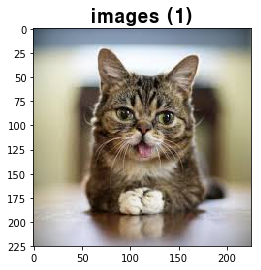

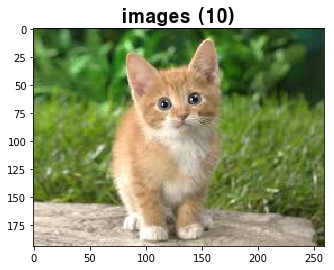

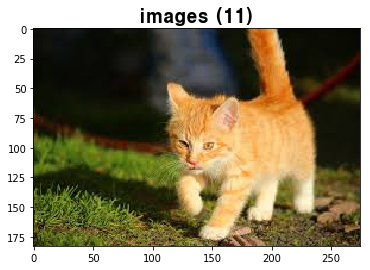

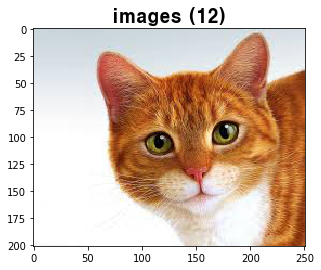

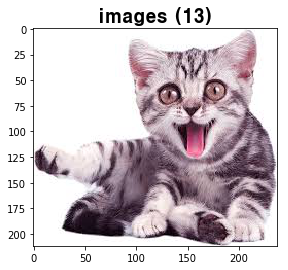

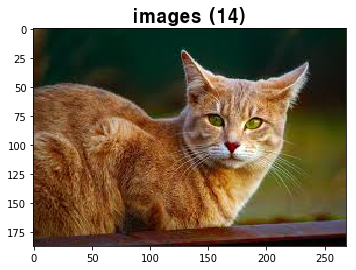

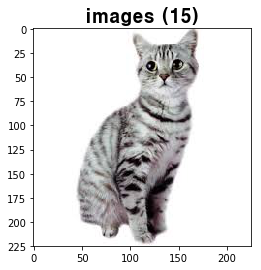

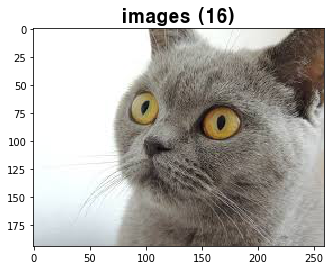

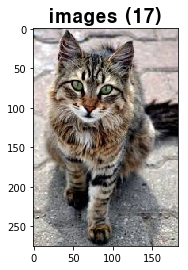

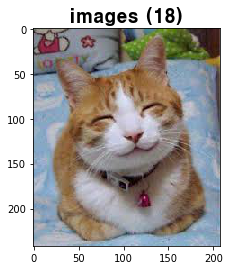

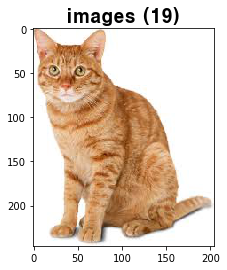

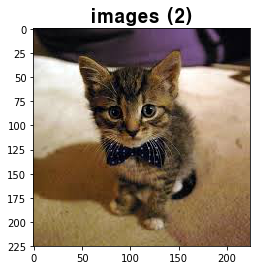

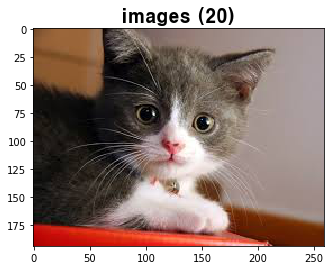

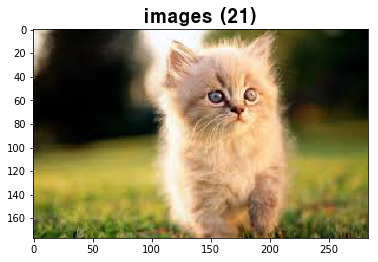

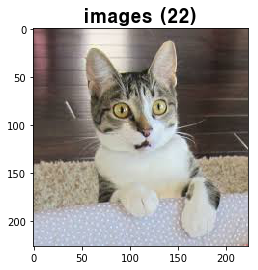

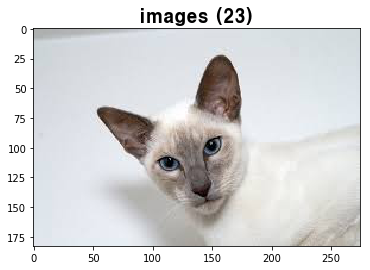

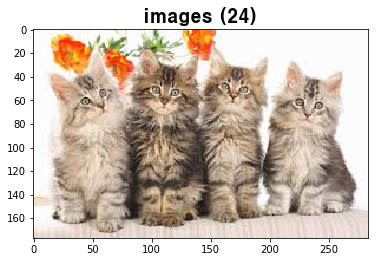

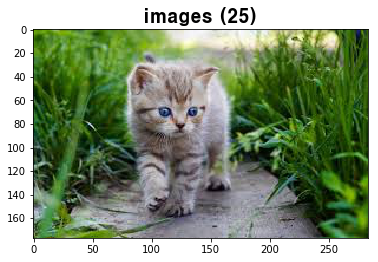

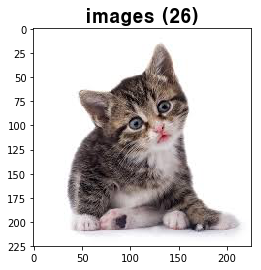

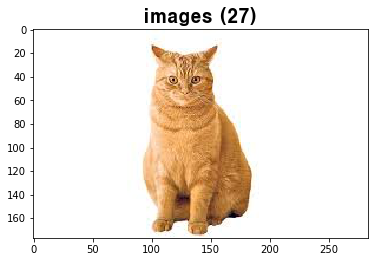

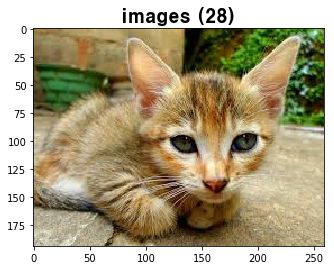

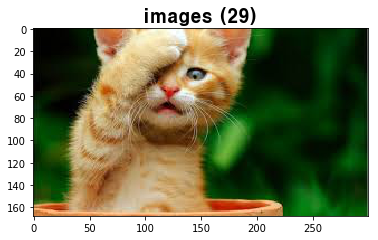

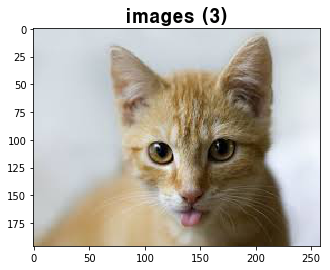

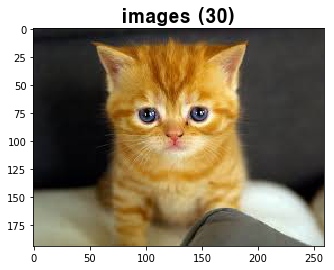

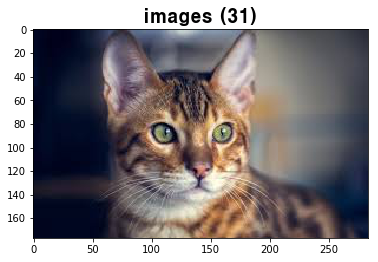

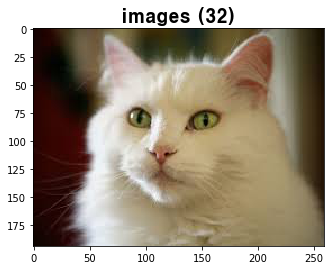

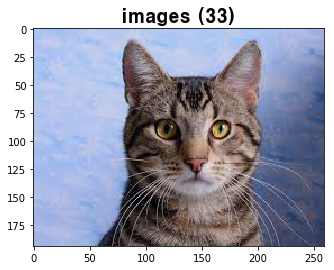

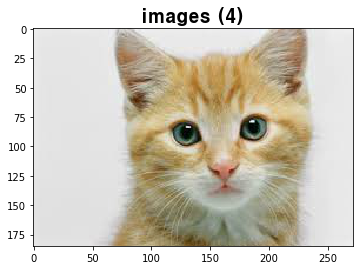

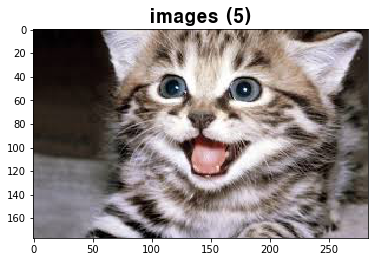

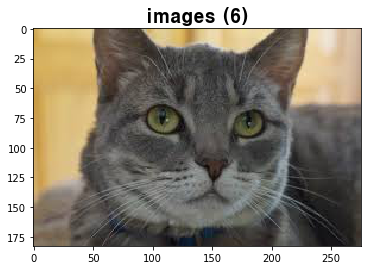

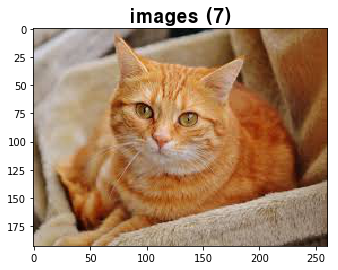

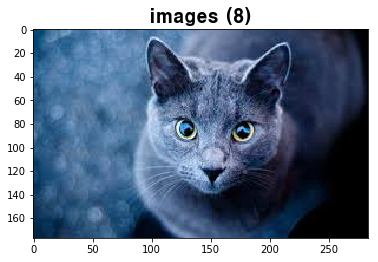

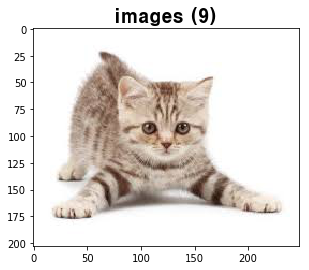

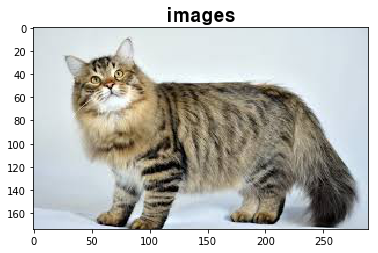

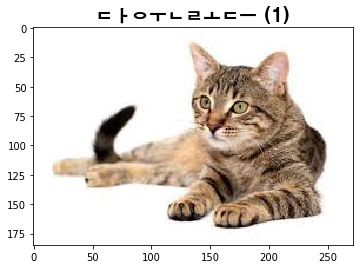

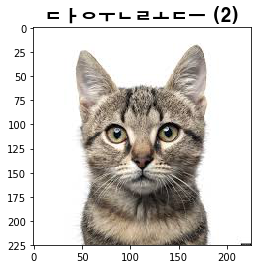

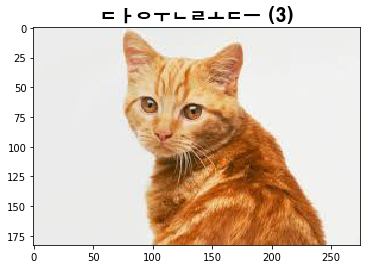

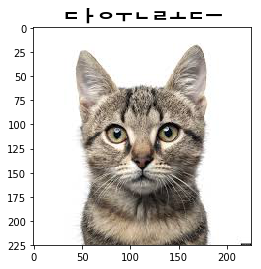

In [221]:
for img, name in zip(imgs, names):
    plt.imshow(img)
    plt.title(name,fontproperties=fontprop)
    plt.show()

In [225]:
a=[1,2,3,4]
b=[6,7,8,9]
zip(a,b)
[(1, 6), (2, 7), (3, 8), (4, 9)]

[(1, 6), (2, 7), (3, 8), (4, 9)]